In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix
import seaborn as sns ; sns.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import keras
import os
from tqdm import tqdm

In [2]:
class_name=['mountain','street','glacier','buildings','sea','forest']
class_name_labels={class_name:i for i , class_name in enumerate(class_name)}
nb_classes=len(class_name)
Image_size=(150,150)
class_name_labels

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [3]:
def load_data():
    data_sets=['/content/drive/MyDrive/Company Project/Akra Tech Pvt ltd/seg_train','/content/drive/MyDrive/Company Project/Akra Tech Pvt ltd/seg_test']
    output=[]

    for dataset in data_sets:
        images=[]
        labels=[]
        print("Loading {}".format(dataset))

        for folder in os.listdir(dataset):
            label=class_name_labels[folder]

            for file in tqdm(os.listdir(os.path.join(dataset,folder))):
                image_path=os.path.join(os.path.join(dataset,folder),file)
                image=cv2.imread(image_path)
                image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,Image_size)
                images.append(image)
                labels.append(label)
        images=np.array(images,dtype='float32')
        labels=np.array(labels,dtype='int32')
        output.append((images,labels))

    return output

In [4]:
(train_images,train_labels),(test_images,test_labels)=load_data()

Loading /content/drive/MyDrive/Company Project/Akra Tech Pvt ltd/seg_train


100%|██████████| 2382/2382 [02:12<00:00, 18.04it/s] 


Loading /content/drive/MyDrive/Company Project/Akra Tech Pvt ltd/seg_test


100%|██████████| 553/553 [00:15<00:00, 34.57it/s] 


In [5]:
 train_images,train_labels=shuffle(train_images,train_labels,random_state=20)

In [6]:
print(train_labels.shape[0])
print(test_labels.shape[0])
print(Image_size)

14034
3000
(150, 150)


In [7]:
_,train_counts=np.unique(train_labels,return_counts=True)
_,test_counts=np.unique(test_labels,return_counts=True)
pd.DataFrame({'train':train_counts,'test':test_counts},index=class_name)

,train,test
mountain,2512,525
street,2382,501
glacier,2404,553
buildings,2191,437
sea,2274,510
forest,2271,474


<Axes: >

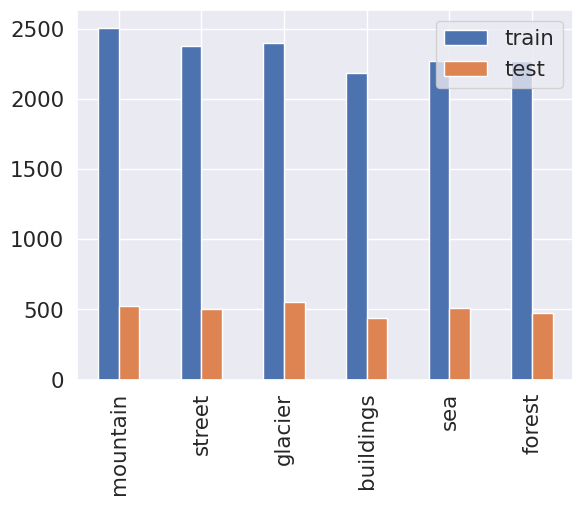

In [8]:
pd.DataFrame({'train':train_counts,'test':test_counts},index=class_name).plot.bar()

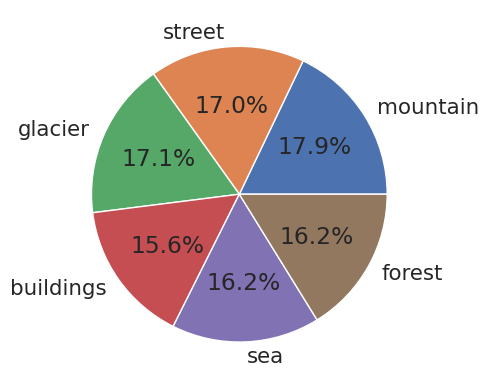

In [9]:
plt.pie(train_counts,explode=(0,0,0,0,0,0),labels=class_name,autopct='%1.1f%%')
plt.show()

In [10]:
train_images=train_images/255.0
test_images=test_images/255.0

In [11]:
def display_random_image(class_names,images,labels):
    index=np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('image ==> {}: ' .format(index)+class_name[labels[index]])
    plt.show()

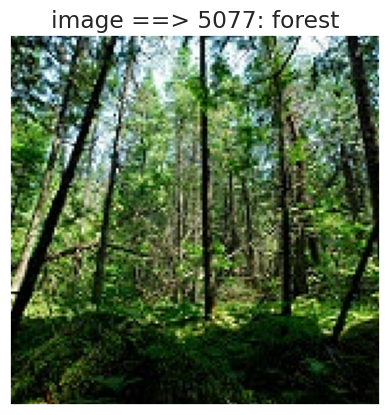

In [12]:
display_random_image(class_name,train_images,train_labels)

In [13]:
def display_25_images(class_names,images,labels):
    plt.figure(figsize=(10,10))
    plt.suptitle('some example',fontsize=19)

    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i],cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(class_names[labels[i]])
    plt.show()

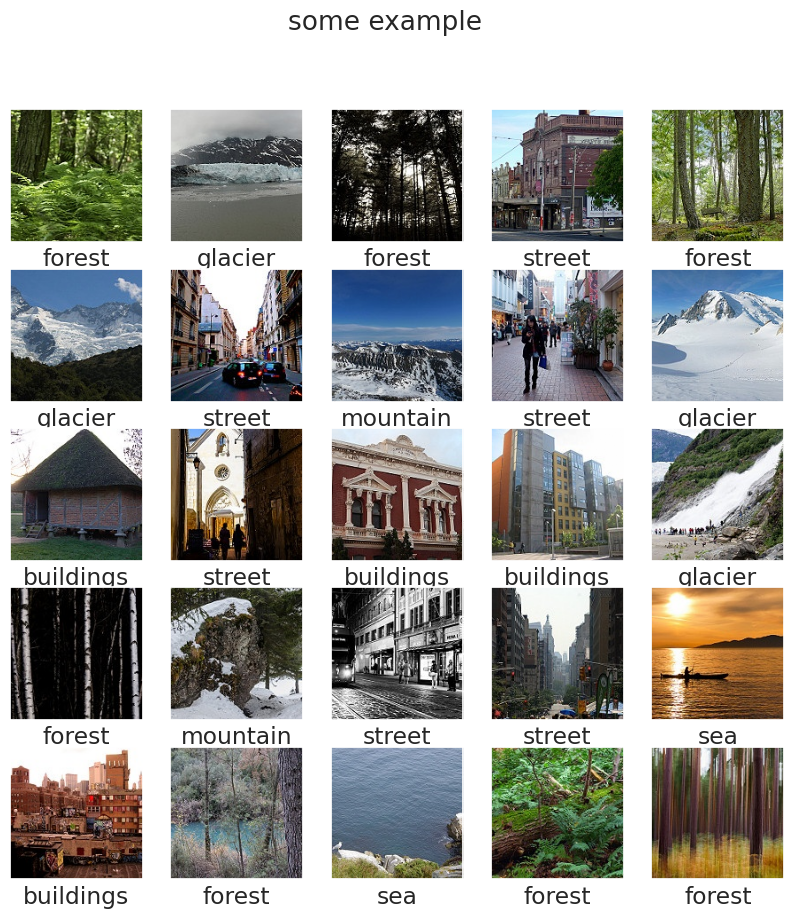

In [14]:
display_25_images(class_name,train_images,train_labels)

In [15]:
CNN_model=tf.keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(6,activation=tf.nn.softmax)
])

In [16]:
CNN_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
history=CNN_model.fit(train_images,train_labels,batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
88/88 [==============================] - 348s 4s/step - loss: 1.1622 - accuracy: 0.5376 - val_loss: 0.9052 - val_accuracy: 0.6576
Epoch 2/20
88/88 [==============================] - 350s 4s/step - loss: 0.8139 - accuracy: 0.6943 - val_loss: 0.7531 - val_accuracy: 0.7118
Epoch 3/20
88/88 [==============================] - 351s 4s/step - loss: 0.6924 - accuracy: 0.7465 - val_loss: 0.8691 - val_accuracy: 0.6808
Epoch 4/20
88/88 [==============================] - 333s 4s/step - loss: 0.5941 - accuracy: 0.7784 - val_loss: 0.5865 - val_accuracy: 0.7891
Epoch 5/20
88/88 [==============================] - 347s 4s/step - loss: 0.5165 - accuracy: 0.8149 - val_loss: 0.5815 - val_accuracy: 0.7855
Epoch 6/20
88/88 [==============================] - 328s 4s/step - loss: 0.4739 - accuracy: 0.8285 - val_loss: 0.6108 - val_accuracy: 0.7859
Epoch 7/20
88/88 [==============================] - 346s 4s/step - loss: 0.3829 - accuracy: 0.8660 - val_loss: 0.5468 - val_accuracy: 0.8108
Epoch 8/20
88

In [18]:
# Evaluate the model on the test set
test_loss, test_acc = CNN_model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

94/94 [==============================] - 20s 205ms/step - loss: 1.0601 - accuracy: 0.7967
Test accuracy: 0.79666668176651
